### Demonstrate the diagnosis of heart disease using a  Standard Heart Disease database from Kaggle/UCI repository and find the best machine learning algorithm among Decision tree and Support Vector Machines in the particular scenario. Evaluate the performance matrices also.

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
               Accuracy  Precision    Recall  F1 Score   ROC-AUC
Decision Tree  0.985366       1.00  0.970874  0.985222  0.985437
SVM            0.814634       0.76  0.922330  0.833333  0.871597


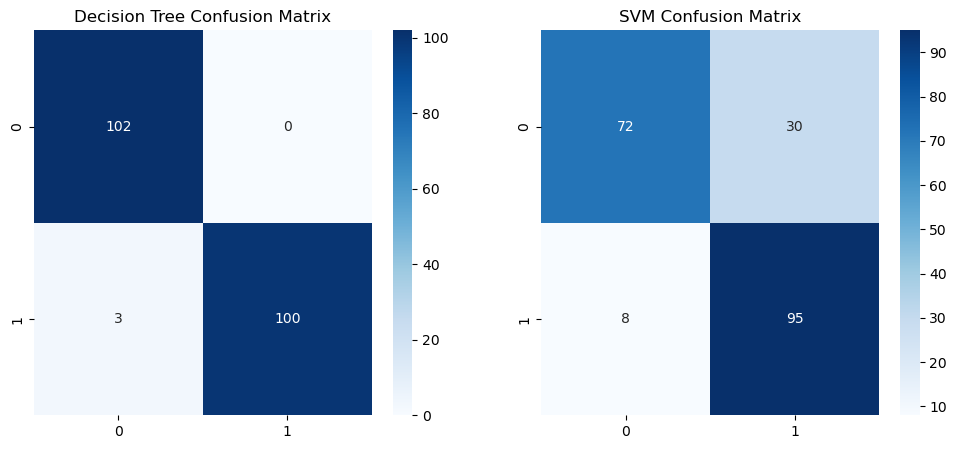

In [1]:
#program 12
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "heart.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

# Data Preprocessing
# Assuming the target variable is 'target' and it's binary (0 or 1)

# Handle missing values (if any)
data = data.dropna()

# Feature selection (based on domain knowledge or feature importance)
features = data.drop(columns=['target'])
target = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Support Vector Machine
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Model Evaluation
# Predictions
dt_predictions = dt_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

# Probabilities for ROC-AUC
dt_probabilities = dt_model.predict_proba(X_test)[:, 1]
svm_probabilities = svm_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
metrics = {
    "Accuracy": [accuracy_score(y_test, dt_predictions), accuracy_score(y_test, svm_predictions)],
    "Precision": [precision_score(y_test, dt_predictions), precision_score(y_test, svm_predictions)],
    "Recall": [recall_score(y_test, dt_predictions), recall_score(y_test, svm_predictions)],
    "F1 Score": [f1_score(y_test, dt_predictions), f1_score(y_test, svm_predictions)],
    "ROC-AUC": [roc_auc_score(y_test, dt_probabilities), roc_auc_score(y_test, svm_probabilities)]
}

metrics_df = pd.DataFrame(metrics, index=['Decision Tree', 'SVM'])
print(metrics_df)
# Confusion Matrix
confusion_dt = confusion_matrix(y_test, dt_predictions)
confusion_svm = confusion_matrix(y_test, svm_predictions)

# Plot confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_dt, annot=True, fmt='d', ax=axes[0], cmap="Blues")
axes[0].set_title('Decision Tree Confusion Matrix')
sns.heatmap(confusion_svm, annot=True, fmt='d', ax=axes[1], cmap="Blues")
axes[1].set_title('SVM Confusion Matrix')

plt.show()